# **Experiment 08 (Hyperparameter optimization)**

## **Name: Fahim Shahriar**
### Github: https://github.com/FahimS45

### Dataset description: https://archive.ics.uci.edu/dataset/2/adult
### Dataset link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score


# Ensure matplotlib inline plotting for Jupyter Notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [67]:
# Load the dataset
data = pd.read_csv('adult.csv', na_values="?", skipinitialspace=True)

In [68]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [69]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [70]:
data.shape

(48842, 15)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [72]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [73]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [74]:
def null_percentage (df):

    df_len = df.shape[0]
    columns = df.columns
    total_null_count = 0

    for each in columns:
        null_count = df[each].isnull().sum()
        if null_count != 0.0:
            null_per = (df[each].isnull().sum() / df_len) * 100
            print(f'Null value percentage in {each} is : {null_per: .2f}')
            total_null_count = total_null_count + null_count
            
    if total_null_count == 0:
        print(f'No null value exist.')

In [75]:
null_percentage(data)

Null value percentage in workclass is :  5.73
Null value percentage in occupation is :  5.75
Null value percentage in native-country is :  1.75


In [76]:
def cat_cols(df):

    categorical_cols = df.select_dtypes(include=['object']).columns
    total_cat_cols = len(categorical_cols)
    total_cols = df.shape[1]

    if total_cat_cols != 0: 
        print(f'Total categorical column {total_cat_cols} out of {total_cols} and they are as follows: ')

        for each in categorical_cols:
            print(each)

        for each in categorical_cols:
            unique_vals = df[each].unique()
            print(f'Feature {each} has {len(unique_vals)} unique values which are: {unique_vals}\n')

In [77]:
cat_cols(data)

Total categorical column 9 out of 15 and they are as follows: 
workclass
education
marital-status
occupation
relationship
race
gender
native-country
income
Feature workclass has 9 unique values which are: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature education has 16 unique values which are: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Feature marital-status has 7 unique values which are: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Feature occupation has 15 unique values which are: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed

**Apply Label encoder**

In [78]:
df = data.copy()

label_encoder = LabelEncoder()

# Function to apply label encoding ignoring missing values
def label_encode_column(column):

    placeholder = 'missing'
    temp_col = column.fillna(placeholder)
    
    encoded_col = label_encoder.fit_transform(temp_col)
    
    encoded_col = pd.Series(encoded_col, index=column.index)
    encoded_col[column.isna()] = np.nan
    
    return encoded_col

for column in df.columns:
    df[column] = label_encode_column(df[column])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3.0,19329,1,6,4,6.0,3,2,1,0,0,39,38.0,0
1,21,3.0,4212,11,8,2,4.0,0,4,1,0,0,49,38.0,0
2,11,1.0,25340,7,11,2,10.0,0,4,1,0,0,39,38.0,1
3,27,3.0,11201,15,9,2,6.0,0,2,1,98,0,39,38.0,1
4,1,NaN,5411,15,9,4,NaN,3,4,0,0,0,29,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3.0,21582,7,11,2,12.0,5,4,0,0,0,37,38.0,0
48838,23,3.0,10584,11,8,2,6.0,0,4,1,0,0,39,38.0,1
48839,41,3.0,10316,11,8,6,0.0,4,4,0,0,0,39,38.0,0
48840,5,3.0,16813,11,8,4,0.0,3,4,1,0,0,19,38.0,0


**Data Visualization**

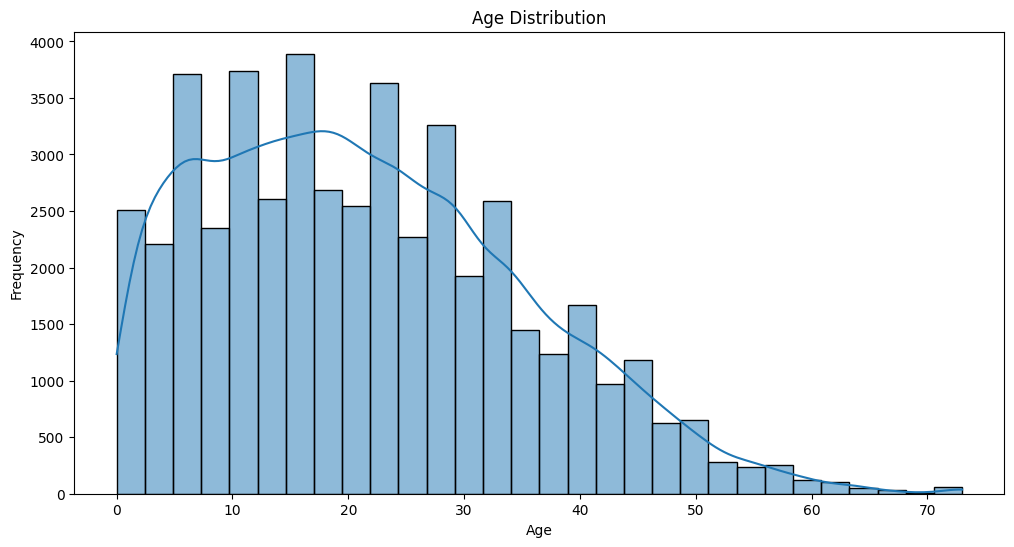

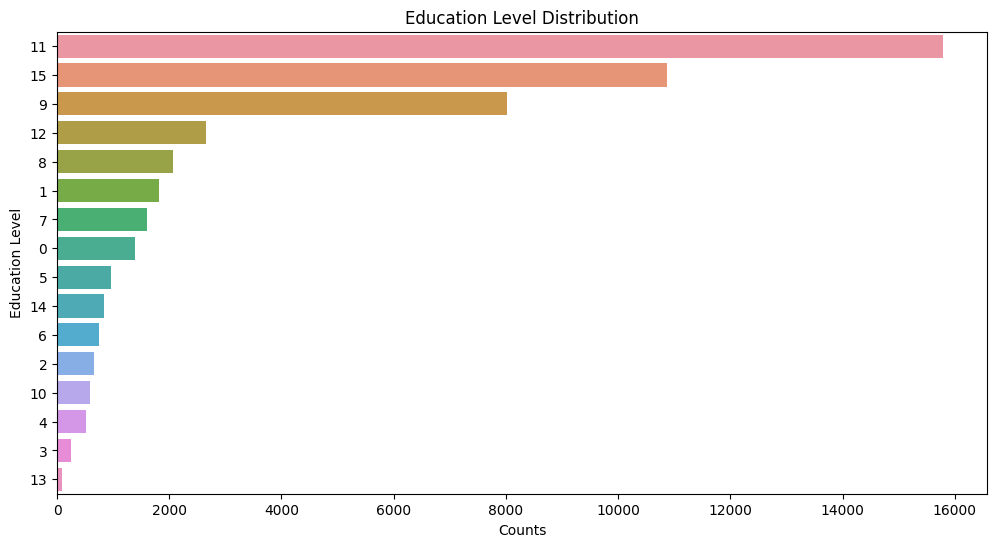

In [79]:
# Histogram for age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


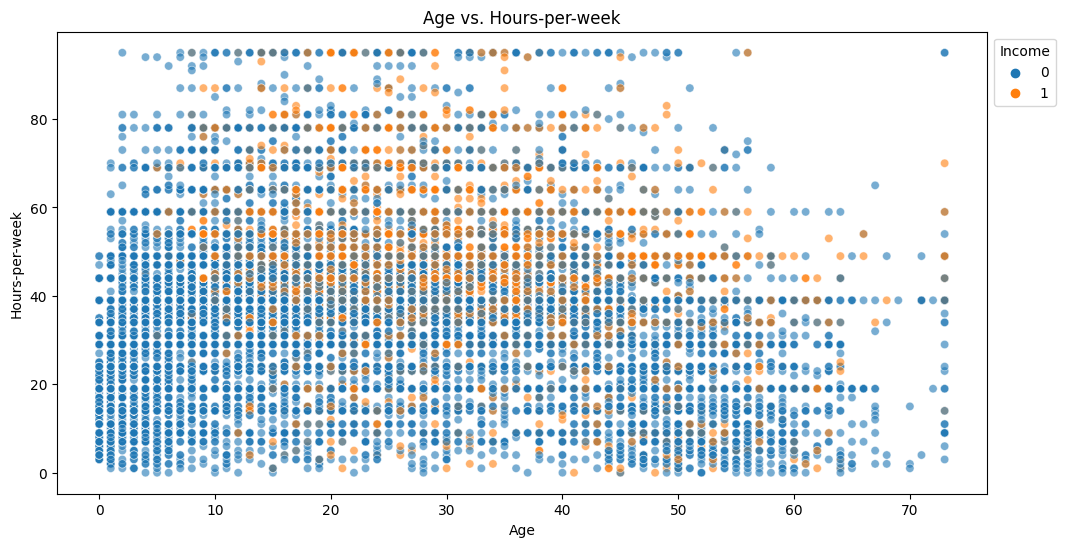

In [80]:
# Scatter plot for age vs hours-per-week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', alpha=0.6)

# Customize the legend
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Age vs. Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

<Figure size 1200x600 with 0 Axes>

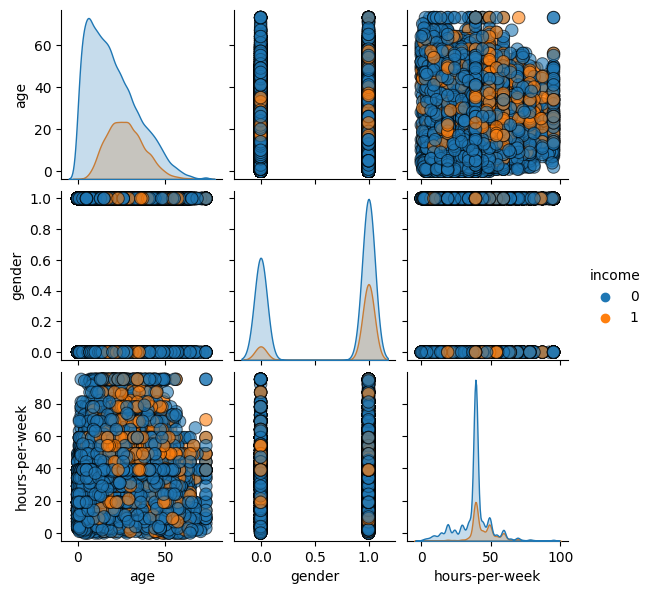

In [81]:
# Pairwise plot -> multi-variate
# Selecting a subset of features for clarity
subset_data = df[['age', 'gender', 'hours-per-week', 'income']]

# Pair plot
plt.figure(figsize=(12, 6))
sns.pairplot(subset_data, hue='income', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


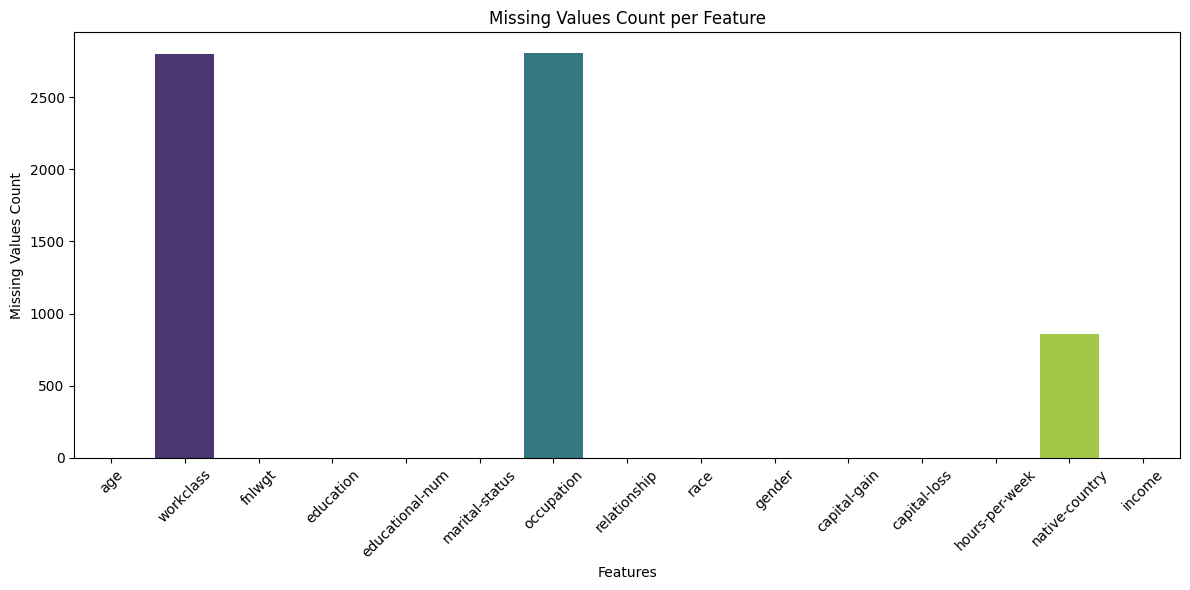

In [82]:
# Visualize null values in bar plot
def null_values_bar_plot(df):

    missing_values = df.isnull().sum()
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

    # Customize the plot
    plt.xlabel('Features')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values Count per Feature')

    # Angle the x-axis tick labels
    plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()

null_values_bar_plot(df)


### **Train Test Split**

In [83]:
X = df.iloc[:, 0:14]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (34189, 14)
Shape of X_test: (14653, 14)
Shape of y_train: (34189,)
Shape of y_test: (14653,)


### **Imputing missing values with mean**

In [84]:
# Imputation with mean
imputer_ = SimpleImputer(strategy='mean')

X_train_imputed = imputer_.fit_transform(X_train)
X_test_imputed = imputer_.transform(X_test)

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 
                'native-country']

X_train_imputed = pd.DataFrame(X_train_imputed, columns=column_names)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=column_names)

### **Outliers Handling**

Outliers detection

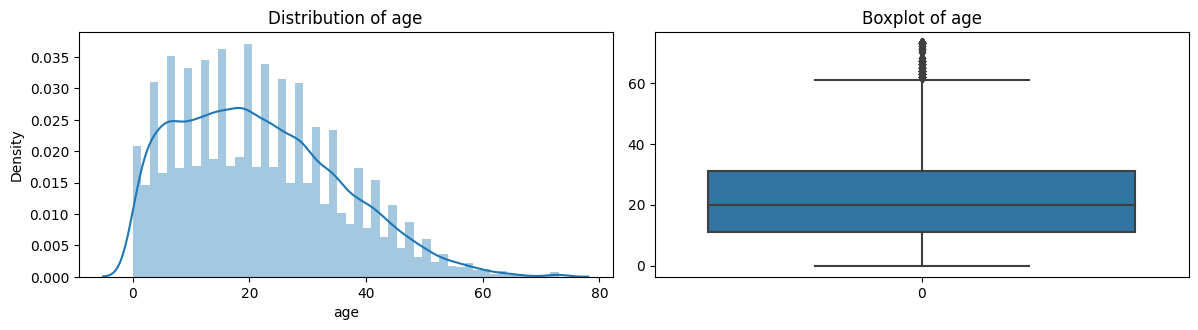

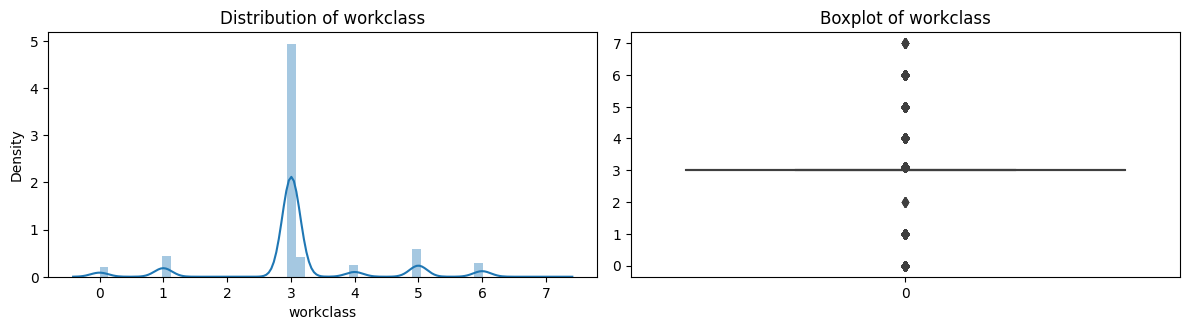

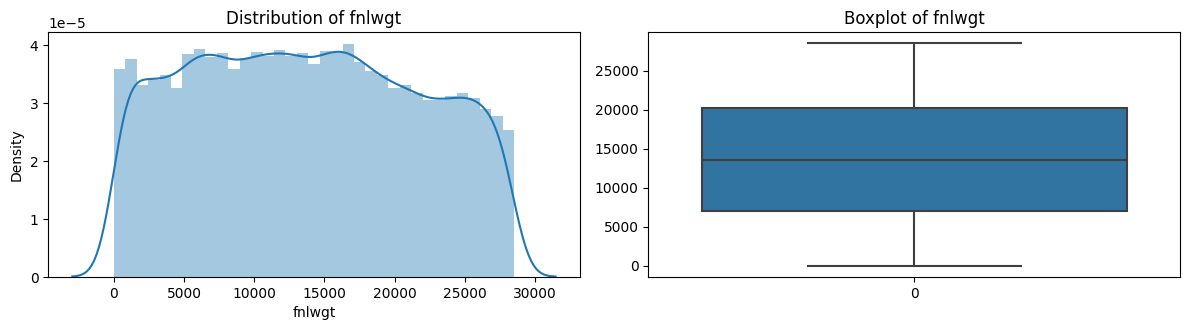

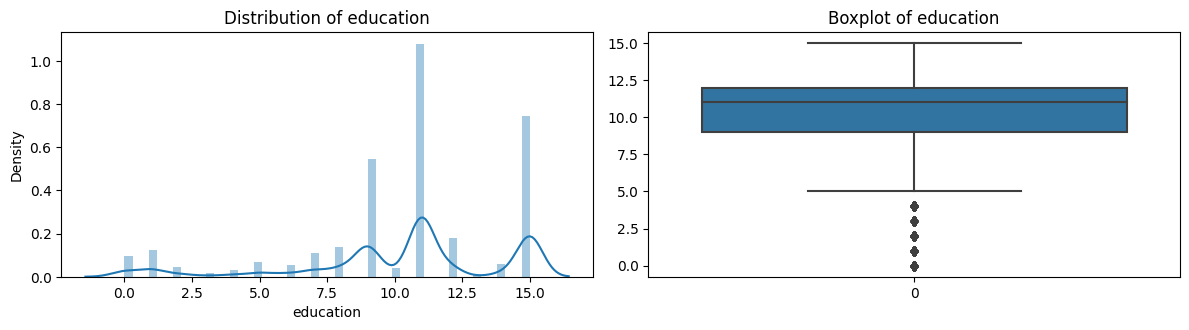

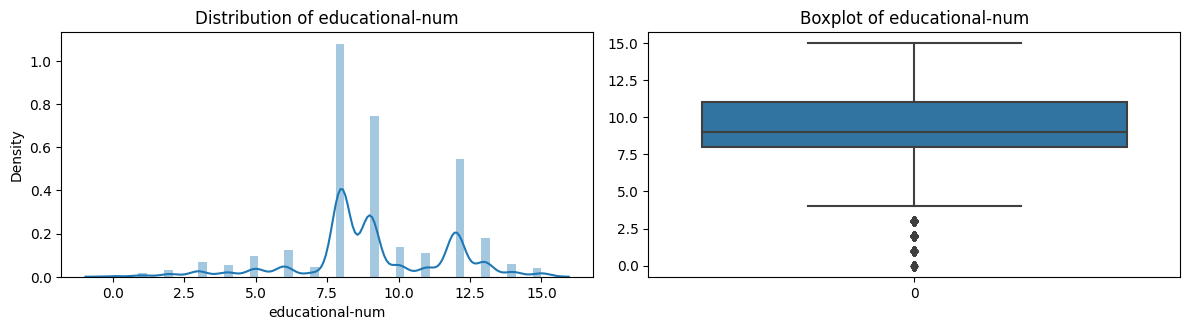

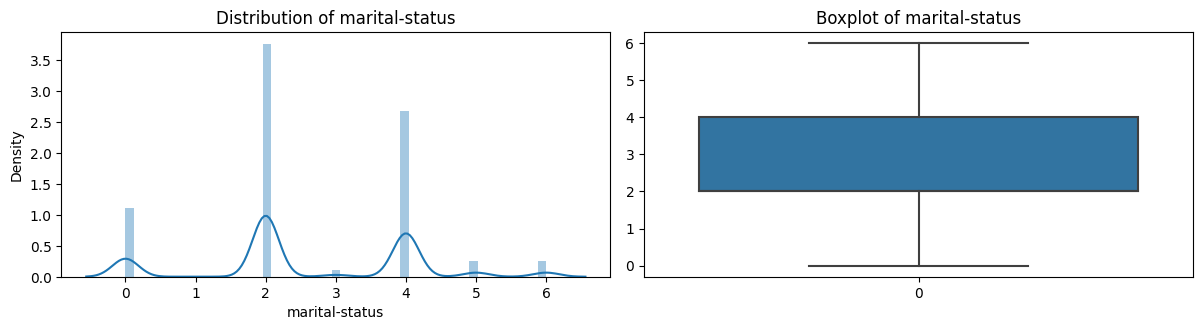

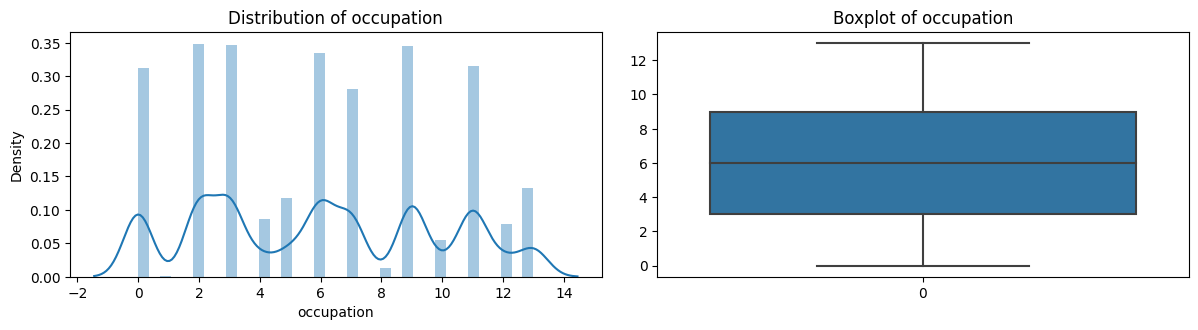

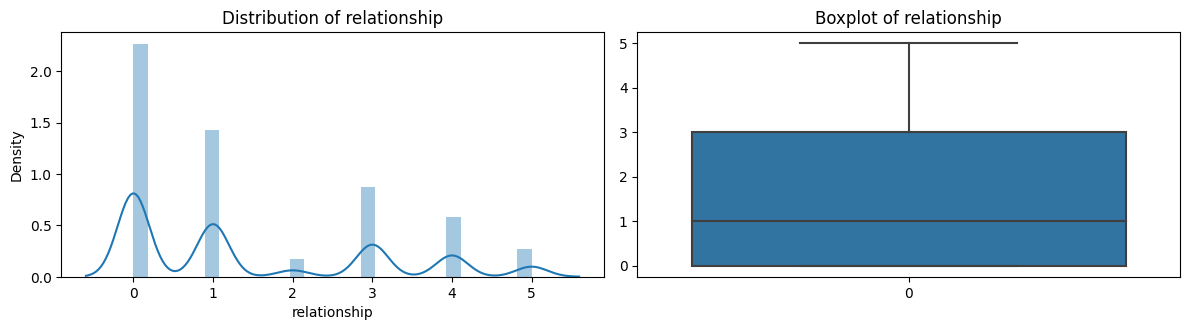

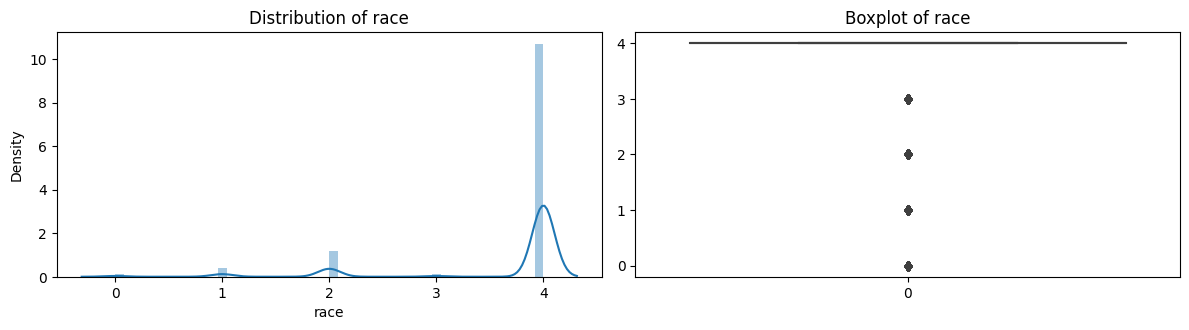

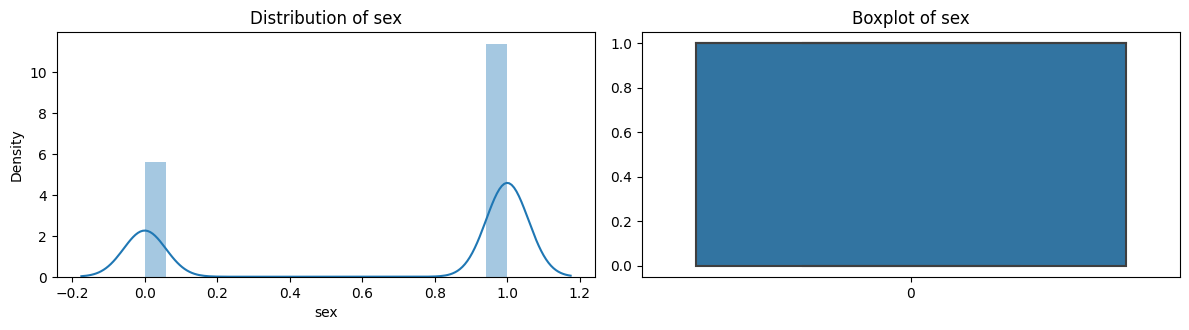

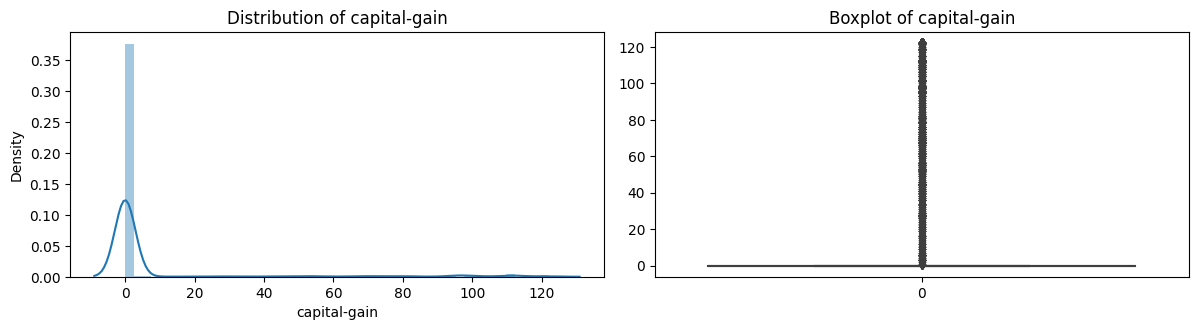

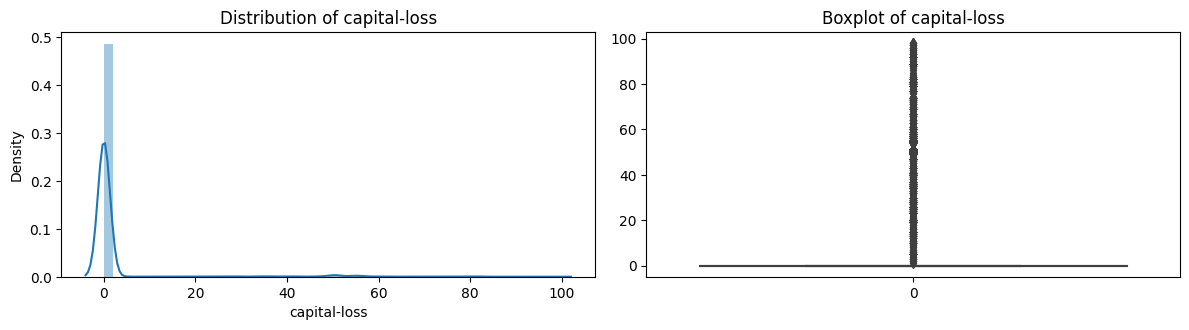

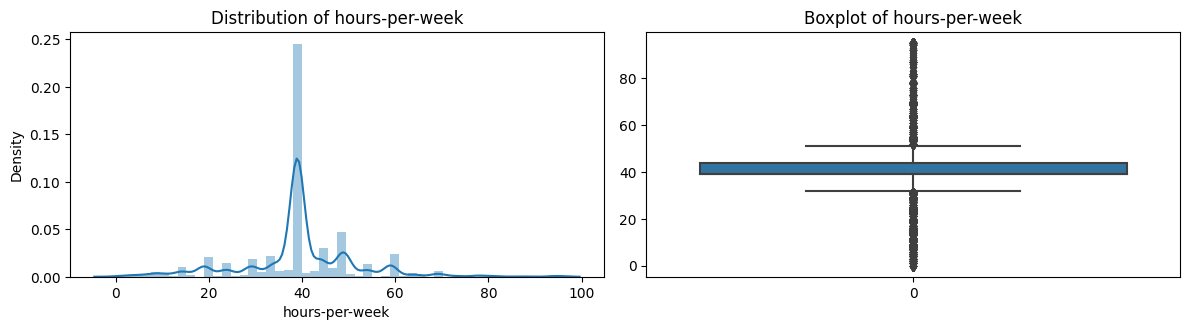

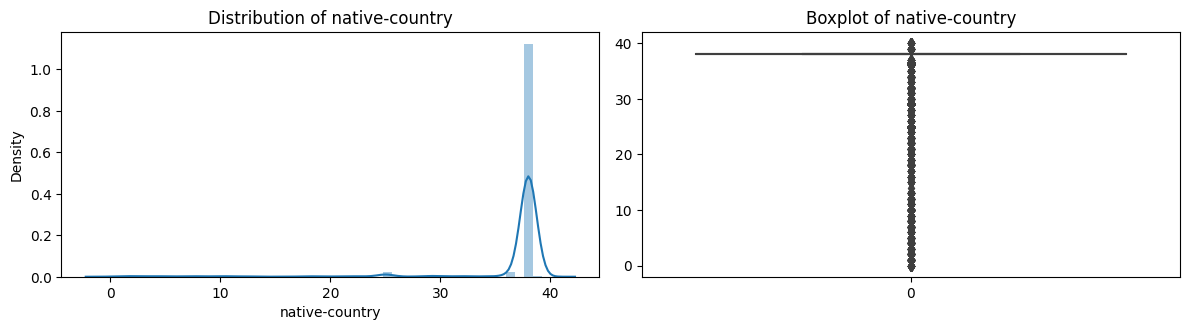

In [85]:
def plot_feature_distributions(df):

    numeric_features = df.select_dtypes(include=['number']).columns
    
    for feature in numeric_features:
        plt.figure(figsize=(12, 6))
        
        # Original distribution plot
        plt.subplot(2, 2, 1)
        sns.distplot(df[feature], kde=True, hist=True)
        plt.title(f'Distribution of {feature}')
        
        # Original boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(df[feature])
        plt.title(f'Boxplot of {feature}')

        plt.tight_layout()
        plt.show()

plot_feature_distributions(X_train_imputed)

Outliers removal: replacing outliers with the median for each column

In [86]:
def outlier_replacement_with_median(df):

    data = df

    for col in data.columns:
        mean = data[col].mean()
        sd = data[col].std()
        median = data[col].median()
        data[col].mask(data[col] > mean+(2*sd), median, inplace=True)
        data[col].mask(data[col] < mean-(2*sd), median, inplace=True)

In [87]:
outlier_replacement_with_median(X_train_imputed)

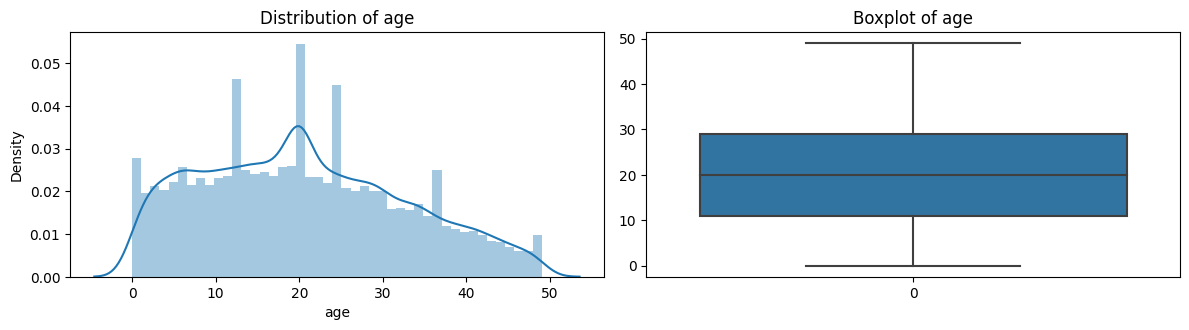

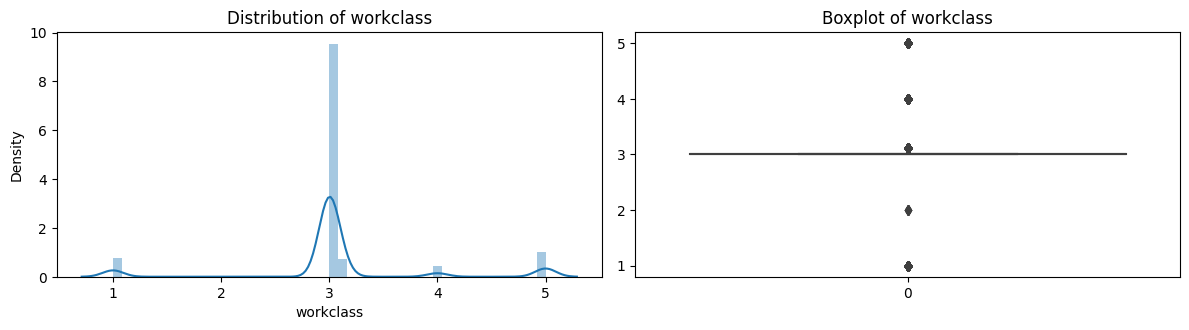

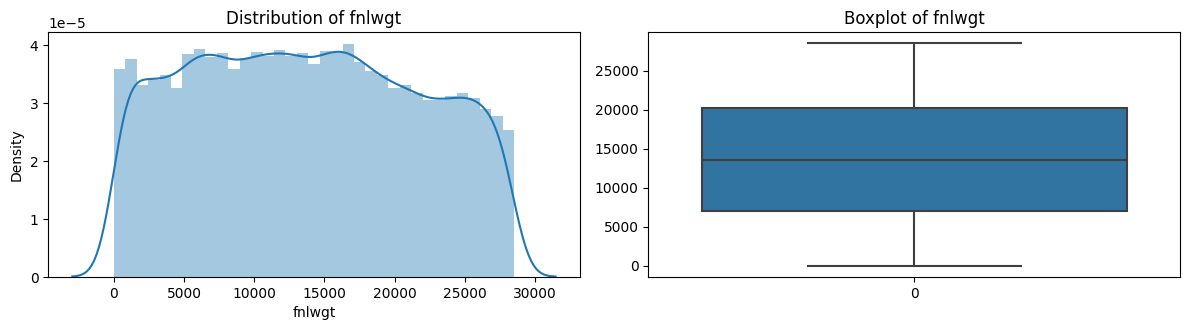

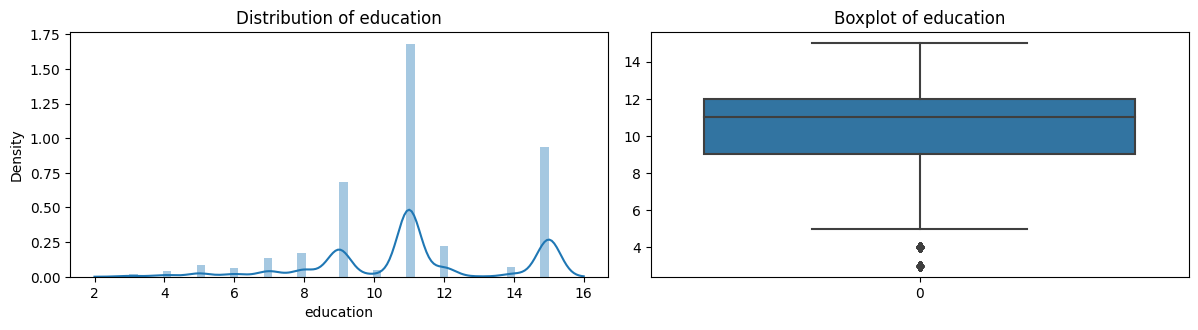

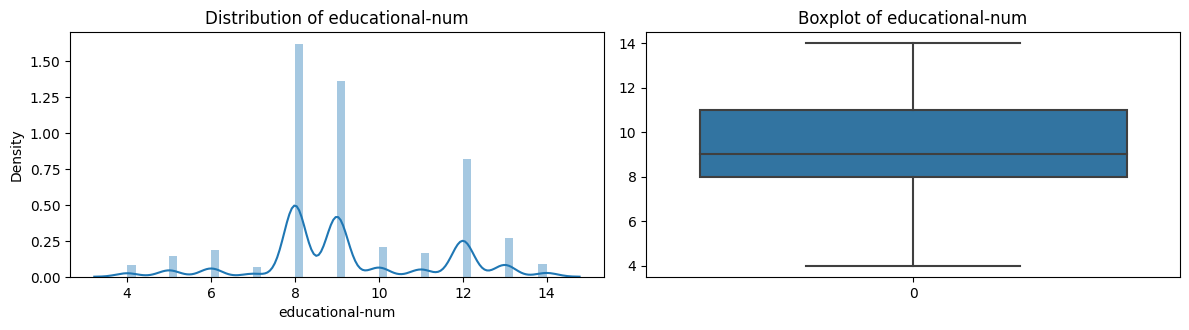

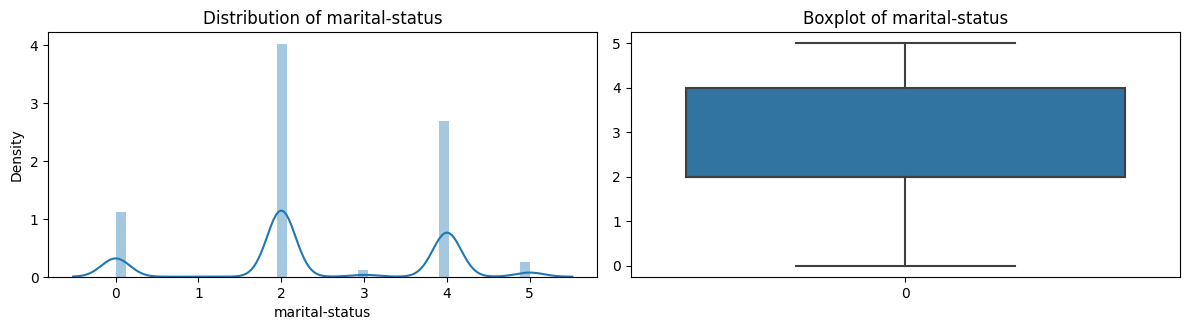

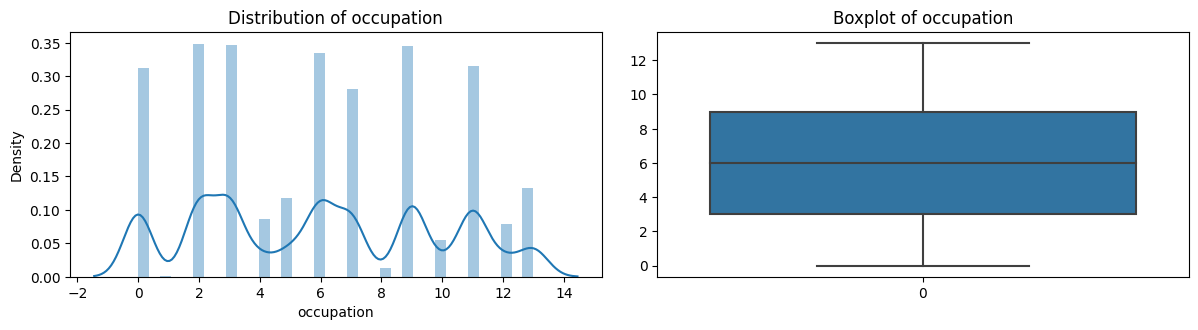

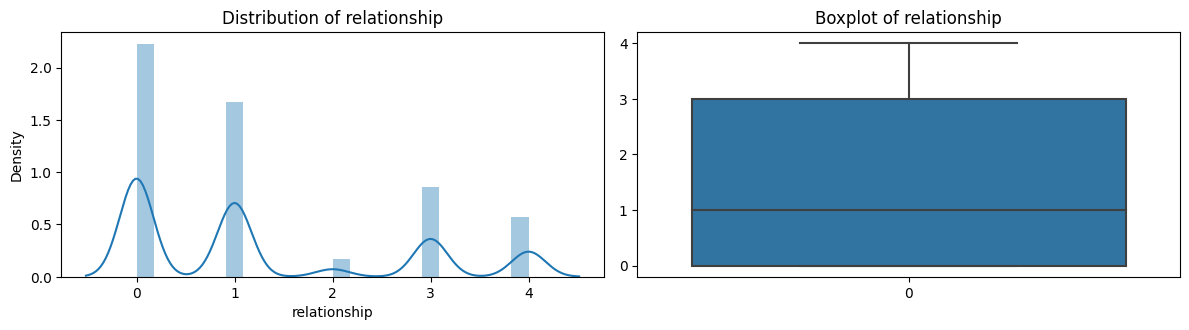

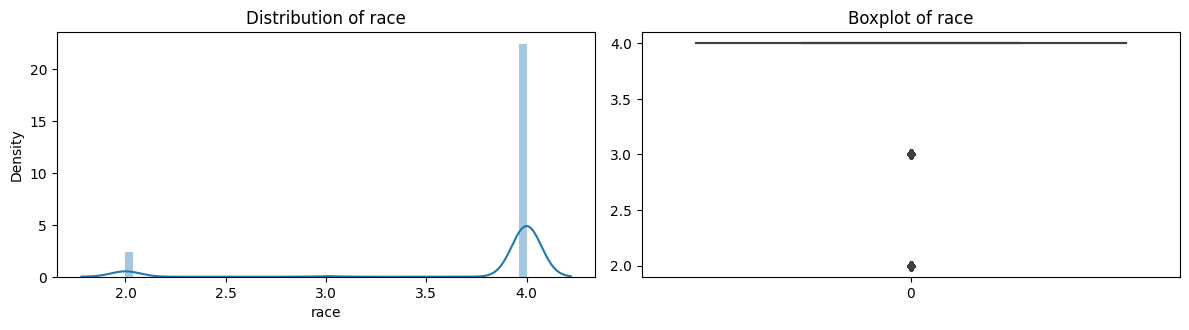

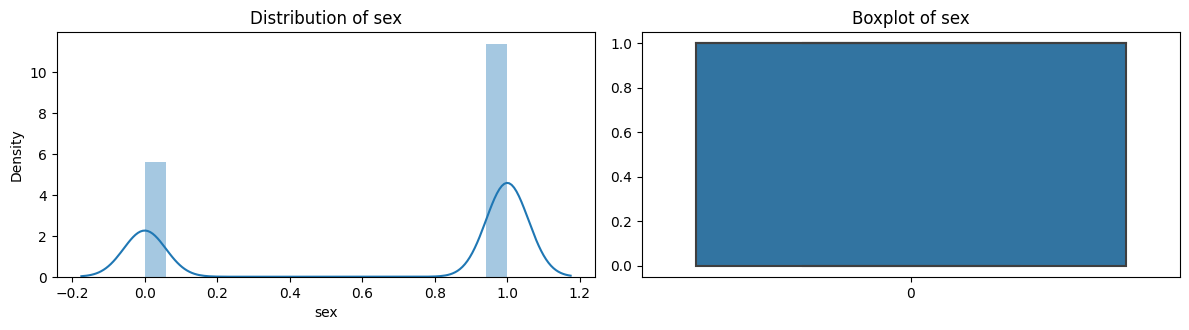

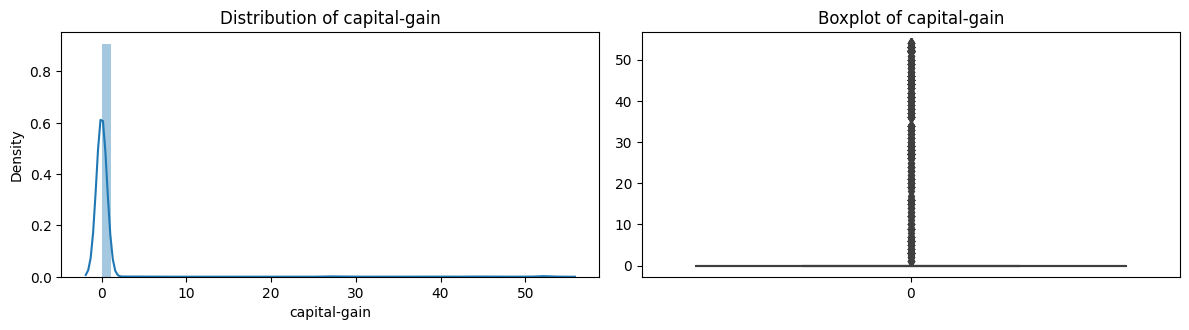

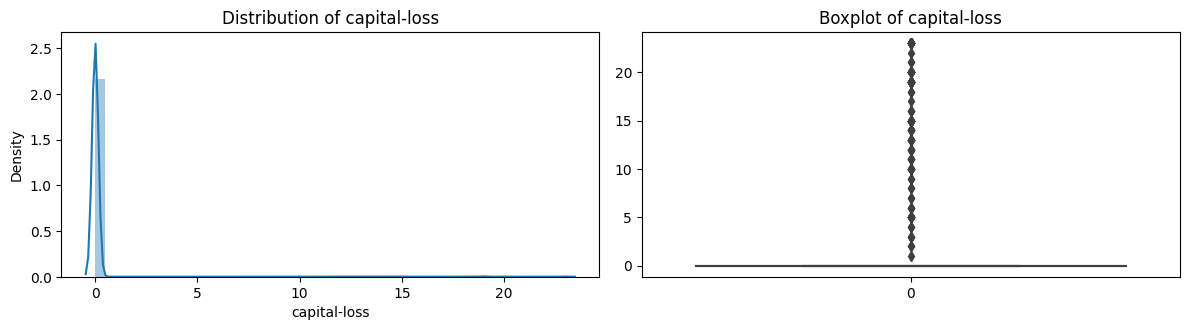

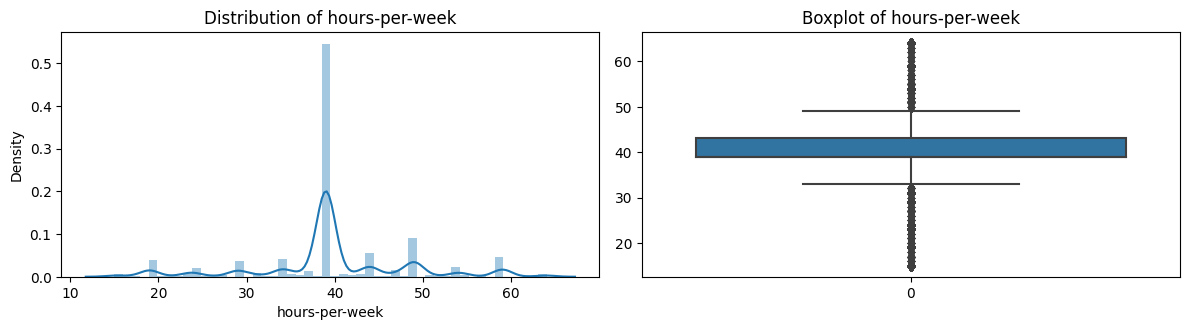

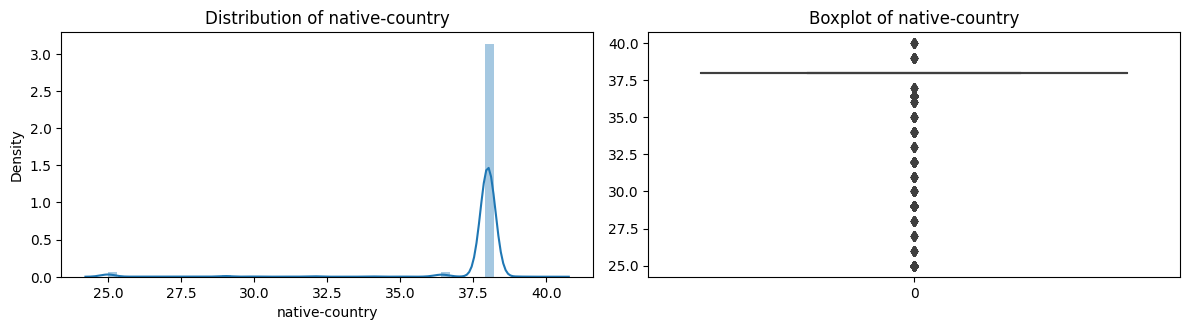

In [88]:
# After handling outliers
plot_feature_distributions(X_train_imputed)

### **Feature Selection**

Dropping columns using pearson correlation

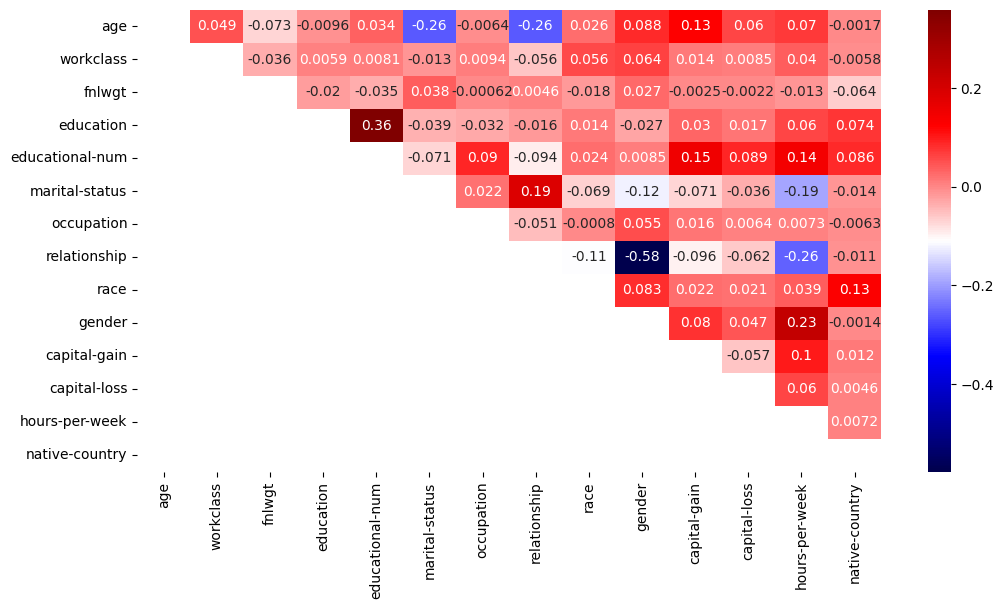

In [89]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

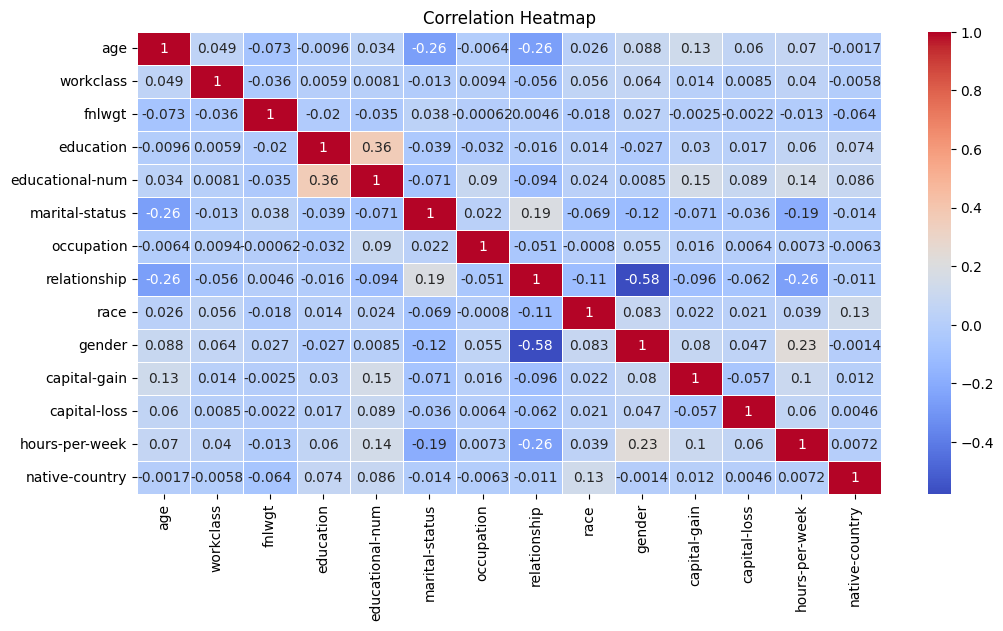

In [90]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [91]:
# Removing features that are highly correlated with another features with a threshold of >=80

def correlation(df, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [92]:
corr_features = correlation(X_train, 0.8) # Threshold as 80% 
print(len(corr_features))
print(corr_features)

0
set()


Now, let's use Recursive Feature Elimination through Cross Validation (RFECV) to select the most valuable features

In [93]:
from sklearn.feature_selection import RFECV

# Explore RFECV technique 
lr = LogisticRegression(solver='liblinear', random_state=42)

rfecv = RFECV(estimator=lr, min_features_to_select=5, step=1, cv=5)
rfecv.fit(X_train_imputed, y_train)

X_train_sub = rfecv.transform(X_train_imputed)

selected_features = df.columns[:-1][rfecv.support_]
print(f'Selected {len(selected_features)} features through RFECVare: {selected_features}')

Selected 13 features through RFECVare: Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


Later in this notebook we will do RFECV to obtain optimum number of features as part of our pipeline

### **Pipeline of all the models and operations**

In [146]:
# Define pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Support Vector Classifier': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'GradientBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=189))
    ]),
    'Bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', BaggingClassifier(random_state=42))
    ])
}

In [147]:
from sklearn import set_config
set_config(display='diagram')
pipelines


{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', LogisticRegression(random_state=42))]),
 'Support Vector Classifier': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', SVC(random_state=42))]),
 'Decision Tree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', DecisionTreeClassifier(random_state=42))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(random_state=42))]),
 'AdaBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', AdaBoostClassifier(random_state=42))]),
 'GradientBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', GradientBoostingClassifier(random_state=42))]),
 'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
 

### **Hyperparameter Optimization using Randomized Search CV**

In [148]:
# Hyperparameter for different models
param_grids = {
    'Logistic Regression': {
        'classifier__C': np.logspace(-4, 4, 20),
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__max_iter': [100, 200, 300, 400, 1000],
        'classifier__tol': [1e-4, 1e-3, 1e-2]
    },
    'Support Vector Classifier': {
        'classifier__C': np.logspace(-2, 2, 5),
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto'],
        'classifier__degree': [2, 3, 4],
        'classifier__coef0': [0.0, 0.1, 0.2]
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 5, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4, 8],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4, 8],
        'classifier__bootstrap': [True, False]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 1, 10],
        'classifier__algorithm': ['SAMME', 'SAMME.R'],
        'classifier__base_estimator': [None, DecisionTreeClassifier(max_depth=1)],
        'classifier__random_state': [42]
    },
    'GradientBoost': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__min_samples_split': [2, 5, 10, 20]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__subsample': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 1],
        'classifier__max_depth': [-1, 5, 10, 20],
        'classifier__num_leaves': [31, 50, 100, 150],
        'classifier__boosting_type': ['gbdt', 'dart', 'goss']
    },
    'Naive Bayes': {},  # GaussianNB has no hyperparameters
    'KNN': {
        'classifier__n_neighbors': [20, 50, 70, 100, 150],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'classifier__leaf_size': [20, 30, 40, 50, 60],
        'classifier__p': [1, 2]
    },
    'Bagging': {
        'classifier__n_estimators': [10, 50, 100, 200],
        'classifier__max_samples': [0.5, 0.7, 1.0],
        'classifier__max_features': [0.5, 0.7, 1.0],
        'classifier__bootstrap': [True, False],
        'classifier__bootstrap_features': [True, False]
    }
}


Best Hyperparameters for Logistic Regression are: {'classifier__tol': 0.01, 'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__max_iter': 200, 'classifier__C': 4.281332398719396}

Logistic Regression Accuracy: 0.80

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88     11138
           1       0.63      0.46      0.53      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.69      0.70     14653
weighted avg       0.79      0.80      0.79     14653



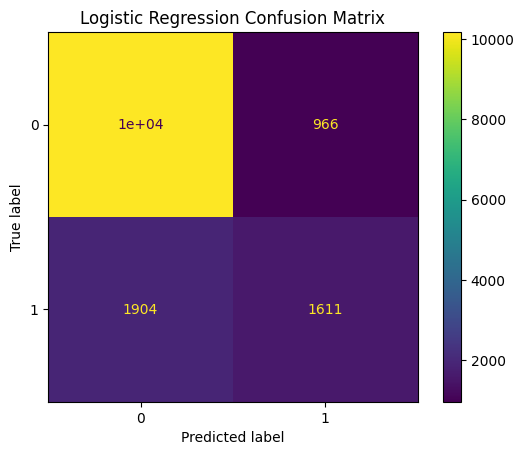

----------------------------------------------------------------------------
Best Hyperparameters for Support Vector Classifier are: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__degree': 3, 'classifier__coef0': 0.0, 'classifier__C': 10.0}

Support Vector Classifier Accuracy: 0.78

Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     11138
           1       0.60      0.28      0.38      3515

    accuracy                           0.78     14653
   macro avg       0.70      0.61      0.63     14653
weighted avg       0.76      0.78      0.75     14653



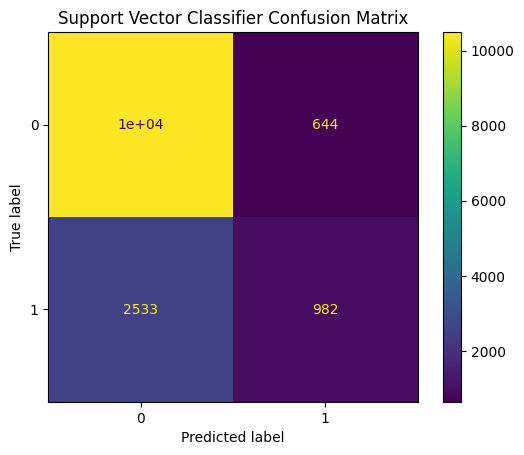

----------------------------------------------------------------------------
Best Hyperparameters for Decision Tree are: {'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__criterion': 'gini'}

Decision Tree Accuracy: 0.82

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     11138
           1       0.67      0.47      0.56      3515

    accuracy                           0.82     14653
   macro avg       0.76      0.70      0.72     14653
weighted avg       0.81      0.82      0.81     14653



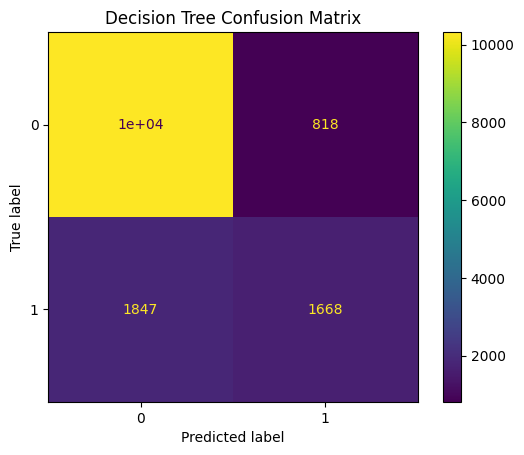

----------------------------------------------------------------------------
Best Hyperparameters for Random Forest are: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 20, 'classifier__bootstrap': True}

Random Forest Accuracy: 0.83

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     11138
           1       0.71      0.50      0.58      3515

    accuracy                           0.83     14653
   macro avg       0.78      0.72      0.74     14653
weighted avg       0.82      0.83      0.82     14653



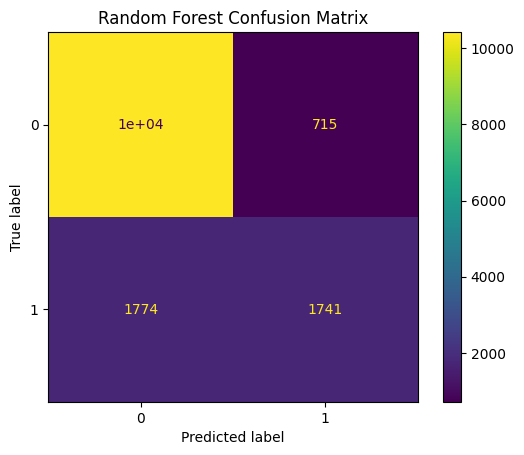

----------------------------------------------------------------------------
Best Hyperparameters for AdaBoost are: {'classifier__random_state': 42, 'classifier__n_estimators': 200, 'classifier__learning_rate': 1, 'classifier__base_estimator': DecisionTreeClassifier(max_depth=1), 'classifier__algorithm': 'SAMME.R'}

AdaBoost Accuracy: 0.80

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     11138
           1       0.61      0.45      0.52      3515

    accuracy                           0.80     14653
   macro avg       0.72      0.68      0.69     14653
weighted avg       0.78      0.80      0.79     14653



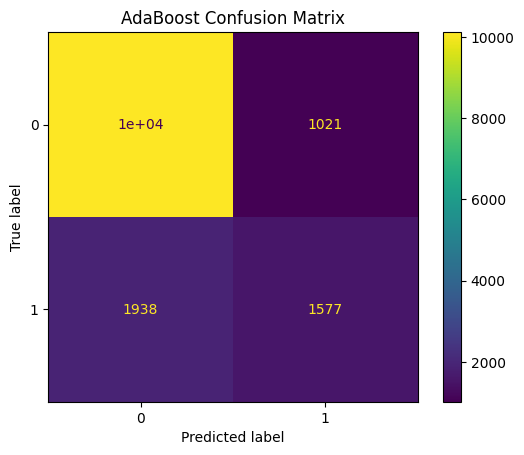

----------------------------------------------------------------------------
Best Hyperparameters for GradientBoost are: {'classifier__subsample': 0.6, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

GradientBoost Accuracy: 0.80

GradientBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88     11138
           1       0.62      0.46      0.53      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.69      0.70     14653
weighted avg       0.79      0.80      0.79     14653



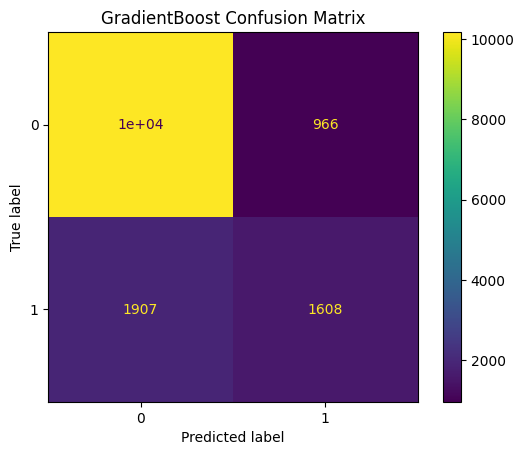

----------------------------------------------------------------------------
Best Hyperparameters for XGBoost are: {'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.6}

XGBoost Accuracy: 0.80

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88     11138
           1       0.62      0.45      0.52      3515

    accuracy                           0.80     14653
   macro avg       0.73      0.68      0.70     14653
weighted avg       0.79      0.80      0.79     14653



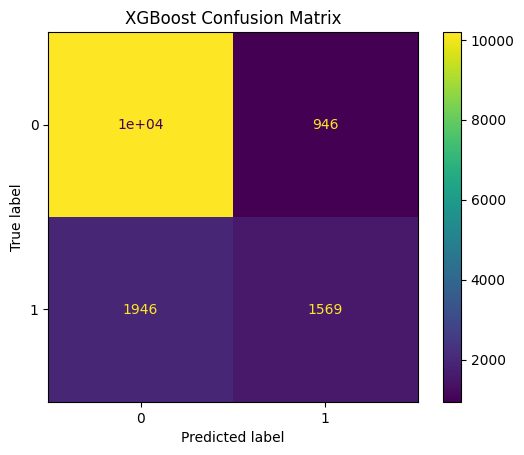

----------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 8172, number of negative: 26017
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 34189, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239024 -> initscore=-1.158036
[LightGBM] [Info] Start training from score -1.158036
Best Hyperparameters for LightGBM are: {'classifier__num_leaves': 31, 'classifier__n_estimators': 300, 'classifier__max_depth': -1, 'classifier__learning_rate': 0.1, 'classifier__boosting_type': 'dart'}

LightGBM Accuracy: 0.81

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     11

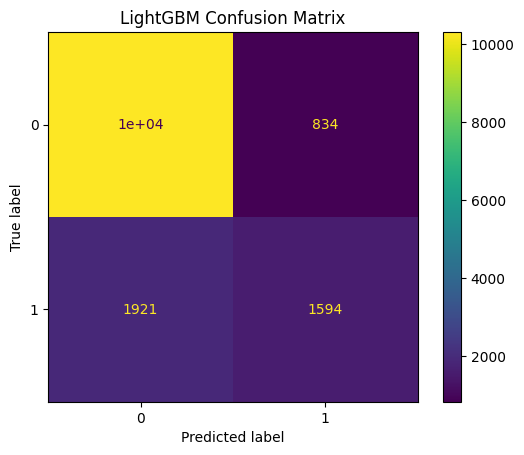

----------------------------------------------------------------------------
Best Hyperparameters for Naive Bayes are: {}

Naive Bayes Accuracy: 0.76

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.76      0.83     11138
           1       0.50      0.75      0.60      3515

    accuracy                           0.76     14653
   macro avg       0.70      0.76      0.71     14653
weighted avg       0.81      0.76      0.77     14653



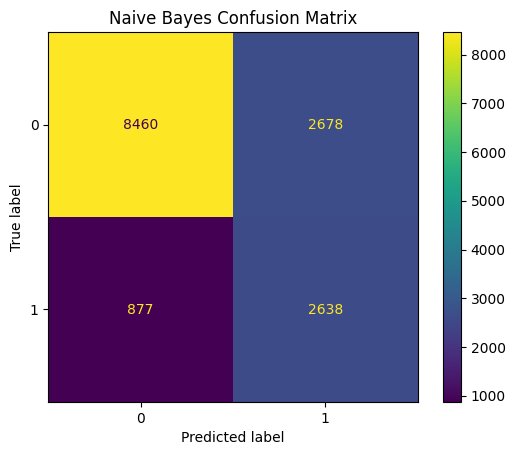

----------------------------------------------------------------------------
Best Hyperparameters for KNN are: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 50, 'classifier__leaf_size': 60, 'classifier__algorithm': 'brute'}

KNN Accuracy: 0.82

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     11138
           1       0.64      0.58      0.61      3515

    accuracy                           0.82     14653
   macro avg       0.75      0.74      0.75     14653
weighted avg       0.82      0.82      0.82     14653



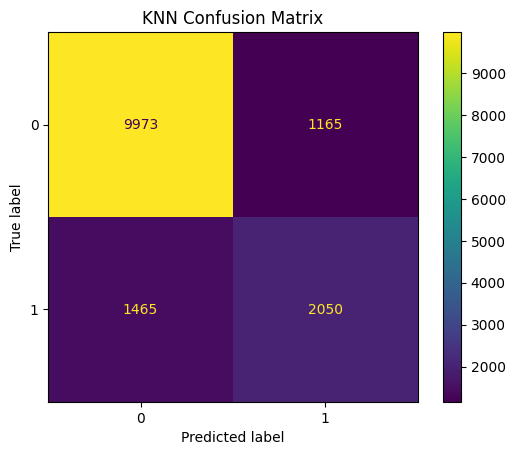

----------------------------------------------------------------------------
Best Hyperparameters for Bagging are: {'classifier__n_estimators': 200, 'classifier__max_samples': 0.5, 'classifier__max_features': 1.0, 'classifier__bootstrap_features': True, 'classifier__bootstrap': True}

Bagging Accuracy: 0.82

Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89     11138
           1       0.69      0.45      0.55      3515

    accuracy                           0.82     14653
   macro avg       0.76      0.69      0.72     14653
weighted avg       0.81      0.82      0.81     14653



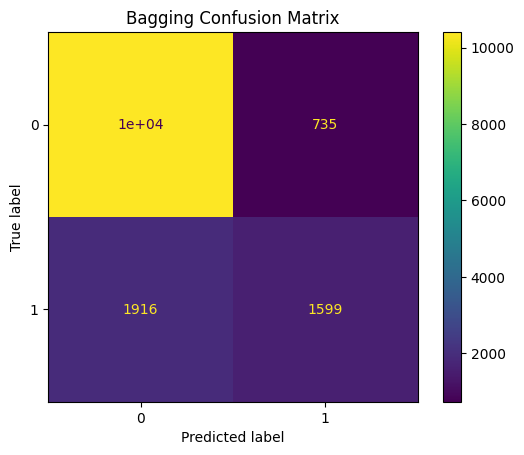

----------------------------------------------------------------------------


In [149]:
from sklearn.model_selection import RandomizedSearchCV

metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {metric: {} for metric in metrics}

for model_name, pipeline in pipelines.items():
    param_grid = param_grids[model_name]
    rscv = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
    
    rscv.fit(X_train_imputed, y_train)
    best_hyper_para = rscv.best_params_
    best_model = rscv.best_estimator_
    
    
    y_pred = best_model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Best Hyperparameters for {model_name} are: {best_hyper_para}\n')
    print(f'{model_name} Accuracy: {accuracy:.2f}\n')
    print(f'{model_name} Classification Report:\n {classification_report(y_test, y_pred)}')

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    for metric_name, metric_func in metrics.items():
        results[metric_name][model_name] = metric_func(y_test, y_pred)

    print('----------------------------------------------------------------------------')

In [150]:
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.804136,0.790233,0.804136,0.793014
Support Vector Classifier,0.783184,0.757192,0.783184,0.751825
Decision Tree,0.818126,0.805679,0.818126,0.806548
Random Forest,0.830137,0.819609,0.830137,0.818928
AdaBoost,0.798062,0.783529,0.798062,0.786908
GradientBoost,0.803931,0.789969,0.803931,0.792754
XGBoost,0.802634,0.787906,0.802634,0.790509
LightGBM,0.811984,0.798160,0.811984,0.799163
Naive Bayes,0.757388,0.807760,0.757388,0.771457
KNN,0.820515,0.815718,0.820515,0.817707
